<a href="https://colab.research.google.com/github/magarthur/Mines/blob/main/RNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [ ]:
!git clone https://github.com/magarthur/Mines.git


fatal: destination path 'Mines' already exists and is not an empty directory.


In [ ]:
import os
os.listdir("Mines")

['bike_daily.csv', '.git', 'data_propre.csv', 'README.md']

In [ ]:
# Assurer la reproductibilité
SEED_VALUE = 123
os.environ['PYTHONHASHSEED'] = str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

tf.random.set_seed(SEED_VALUE)
tf.config.experimental.enable_op_determinism()

In [ ]:
data = pd.read_csv("Mines/data_propre.csv")
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


1.

Les variables atemp, temp, hum et windspeed sont toutes des variables continues déjà normalisées, il n'y a donc pas besoin d'appliquer un nouveau traitement.

Le but est de prédire si le nombre de vélos dépassent le seuil de 4000, on classifie donc les journées en deux types. On crée pour cela donc une nouvelle colonne "class" qui vaut 1 lorsque "cnt" est supérieur à 4000 et 0 sinon.

In [ ]:
data["class"] = np.where(data["cnt"] >= 4000, 1, 0)
data.drop(["dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "casual", "registered", "cnt"], axis =1, inplace=True)

2.

On divise nos données en données d'apprentissage et en données test avec une proportion 80/20.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("class", axis=1), data["class"], test_size=0.2, random_state=123)

On vérifie que les proportions des classes sont les mêmes dans les données d'apprentissage et dans les données test.

In [ ]:
repartition_train = y_train.value_counts()[1]/len(y_train)
repartition_test = y_test.value_counts()[1]/len(y_test)
print("La proportion de lignes appartenant à la classe 1 dans les données d'apprentissage est : ")
print(repartition_train)
print("La proportion de lignes appartenant à la classe 1 dans les données de test est : ")
print(repartition_test)

La proportion de lignes appartenant à la classe 1 dans les données d'apprentissage est : 
0.6147260273972602
La proportion de lignes appartenant à la classe 1 dans les données de test est : 
0.6326530612244898


On obtient des porportions semblables, les classes sont réparties équitablement entre les données d'apprentissage et les données test.

# Premier modèle

In [ ]:
model = Sequential()
# on commence avec une seule couche cachée de quatres neurones
model.add(
    Dense(8, input_shape=(X_train.shape[1],), activation="relu"))
# couche de sortie
model.add(Dense(1, activation="sigmoid"))
model.summary()

# compile the model
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# now we just update our model fit call
history = model.fit(
    X_train,
    y_train,
    epochs=400,
    batch_size=100,
    validation_data=(X_test, y_test),
    verbose=1,
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8294 - loss: 0.6286 - val_accuracy: 0.7891 - val_loss: 0.6387
Epoch 2/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8238 - loss: 0.6213 - val_accuracy: 0.7619 - val_loss: 0.6320
Epoch 3/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7849 - loss: 0.6152 - val_accuracy: 0.7279 - val_loss: 0.6264
Epoch 4/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7229 - loss: 0.6101 - val_accuracy: 0.7075 - val_loss: 0.6218
Epoch 5/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6964 - loss: 0.6059 - val_accuracy: 0.6803 - val_loss: 0.6182
Epoch 6/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6832 - loss: 0.6025 - val_accuracy: 0.6599 - val_loss: 0.6152
Epoch 7/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6557 - loss: 0.5996 - val_accuracy: 0.6531 - val_loss: 0.6128
Epoch 8/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6375 - loss: 0.5973 - val_accuracy: 0.6531 - val_loss:

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

print("Test loss     :", score[0])
print("Test accuracy :", score[1])

Test loss     : 0.5212410688400269
Test accuracy : 0.7891156673431396


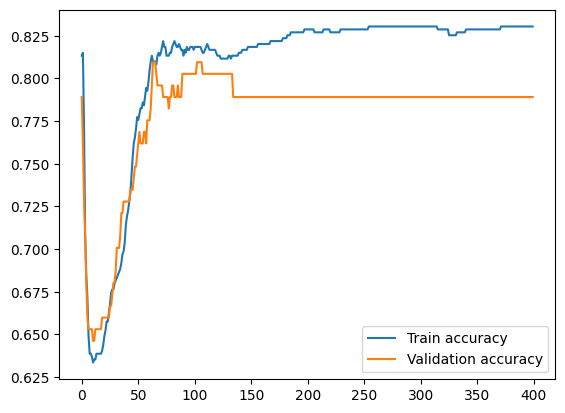

In [ ]:
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend()

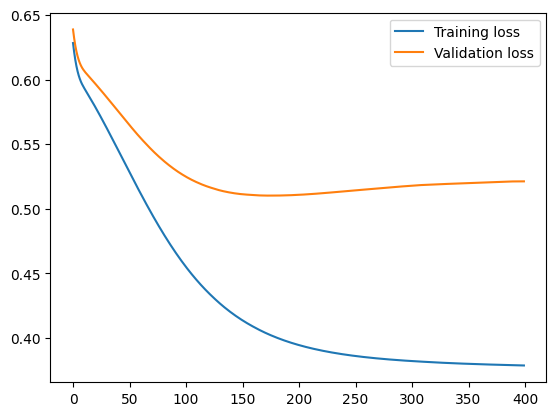

In [ ]:
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.legend()

In [ ]:
model.predict(X_test)
preds = np.round(model.predict(X_test), 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
print(confusion_matrix(y_test, preds))

[[37 17]
 [14 79]]


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      0.69      0.70        54
           1       0.82      0.85      0.84        93

    accuracy                           0.79       147
   macro avg       0.77      0.77      0.77       147
weighted avg       0.79      0.79      0.79       147



# Deuxième modèle

In [ ]:
model_2 = Sequential()
# on commence avec une seule couche cachée de quatres neurones
model_2.add(
    Dense(8, input_shape=(X_train.shape[1],), activation="relu"))
# couche de sortie
model_2.add(Dense(1, activation="sigmoid"))
model_2.summary()

# compile the model
model_2.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# now we just update our model fit call
history_2 = model_2.fit(
    X_train,
    y_train,
    epochs=110,
    batch_size=100,
    validation_data=(X_test, y_test),
    verbose=1,
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5601 - loss: 0.6888 - val_accuracy: 0.5782 - val_loss: 0.6848
Epoch 2/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6064 - loss: 0.6844 - val_accuracy: 0.6054 - val_loss: 0.6809
Epoch 3/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6222 - loss: 0.6805 - val_accuracy: 0.6259 - val_loss: 0.6773
Epoch 4/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6247 - loss: 0.6769 - val_accuracy: 0.6327 - val_loss: 0.6741
Epoch 5/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6210 - loss: 0.6737 - val_accuracy: 0.6327 - val_loss: 0.6712
Epoch 6/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6194 - loss: 0.6708 - val_accuracy: 0.6327 - val_loss: 0.6687
Epoch 7/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6194 - loss: 0.6683 - val_accuracy: 0.6327 - val_loss: 0.6666
Epoch 8/110
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6194 - loss: 0.6659 - val_accuracy: 0.6327 - val_loss:

In [ ]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)

print("Test loss     :", score[0])
print("Test accuracy :", score[1])

Test loss     : 0.5351247191429138
Test accuracy : 0.795918345451355


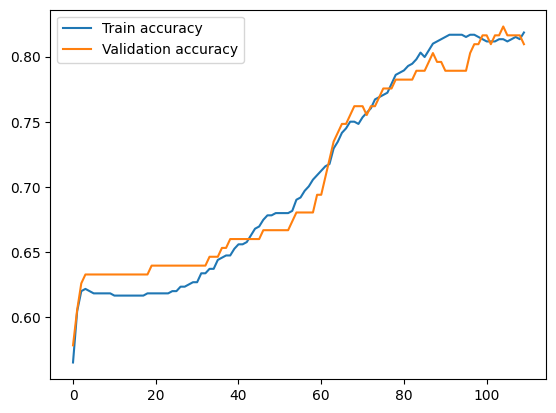

In [ ]:
plt.plot(history_2.history["accuracy"], label = "Train accuracy")
plt.plot(history_2.history["val_accuracy"], label = "Validation accuracy")
plt.legend()

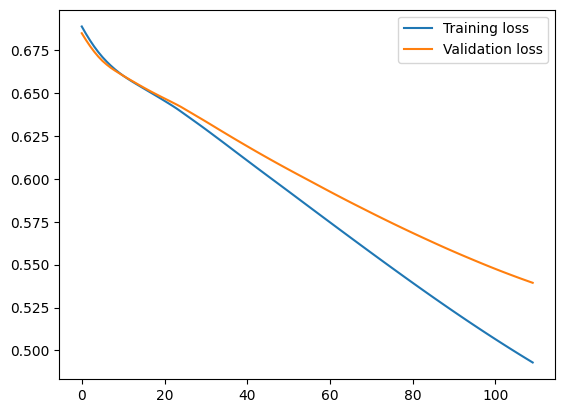

In [ ]:
plt.plot(history_2.history["loss"], label = "Training loss")
plt.plot(history_2.history["val_loss"], label = "Validation loss")
plt.legend()

In [ ]:
model_2.predict(X_test)
preds_2 = np.round(model_2.predict(X_test), 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
print(confusion_matrix(y_test, preds_2))

[[34 20]
 [ 8 85]]


In [ ]:
print(classification_report(y_test, preds_2))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71        54
           1       0.81      0.91      0.86        93

    accuracy                           0.81       147
   macro avg       0.81      0.77      0.78       147
weighted avg       0.81      0.81      0.80       147



# Troisième modèle

In [ ]:
model = Sequential()
# 1ere couche cahcée
model.add(Dense(16, input_shape=(X_train.shape[1],), activation="relu"))
# couche de sortie
model.add(Dense(1, activation="sigmoid"))
model.summary()

# compile the model
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# now we just update our model fit call
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=100,
    validation_data=(X_test, y_test),
    verbose=2,
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
6/6 - 2s - 290ms/step - accuracy: 0.5976 - loss: 0.6914 - val_accuracy: 0.6327 - val_loss: 0.6843
Epoch 2/200
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6836 - val_accuracy: 0.6327 - val_loss: 0.6769
Epoch 3/200
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6770 - val_accuracy: 0.6327 - val_loss: 0.6704
Epoch 4/200
6/6 - 0s - 18ms/step - accuracy: 0.6147 - loss: 0.6713 - val_accuracy: 0.6327 - val_loss: 0.6647
Epoch 5/200
6/6 - 0s - 20ms/step - accuracy: 0.6147 - loss: 0.6663 - val_accuracy: 0.6327 - val_loss: 0.6598
Epoch 6/200
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6620 - val_accuracy: 0.6327 - val_loss: 0.6556
Epoch 7/200
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6583 - val_accuracy: 0.6327 - val_loss: 0.6521
Epoch 8/200
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6551 - val_accuracy: 0.6327 - val_loss: 0.6492
Epoch 9/200
6/6 - 0s - 17ms/step - accuracy: 0.6147 - loss: 0.6524 - val_accuracy: 0.6327 - val_loss: 0.6466
Epoch 10/200
6/6 -

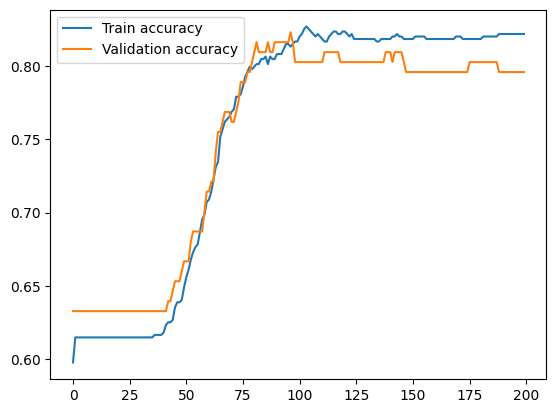

In [ ]:
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend()

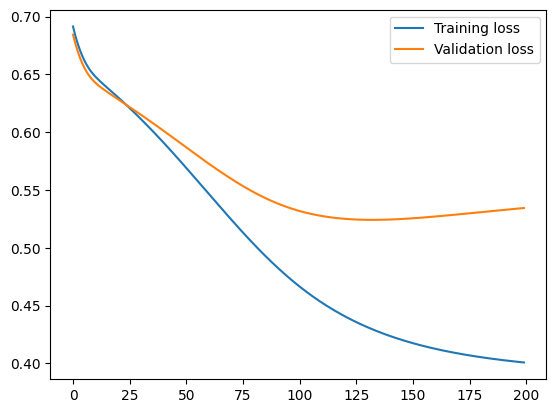

In [ ]:
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.legend()

In [ ]:
model.predict(X_test)
preds = np.round(model.predict(X_test), 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
print(confusion_matrix(y_test, preds))

[[38 16]
 [14 79]]


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72        54
           1       0.83      0.85      0.84        93

    accuracy                           0.80       147
   macro avg       0.78      0.78      0.78       147
weighted avg       0.79      0.80      0.80       147



# Quatrième modèle

In [ ]:
model = Sequential()
# 1ere couche cahcée
model.add(Dense(16, input_shape=(X_train.shape[1],), activation="relu"))
# couche de sortie
model.add(Dense(1, activation="sigmoid"))
model.summary()

# compile the model
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# now we just update our model fit call
history = model.fit(
    X_train,
    y_train,
    epochs=110,
    batch_size=100,
    validation_data=(X_test, y_test),
    verbose=2,
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/110
6/6 - 1s - 179ms/step - accuracy: 0.6284 - loss: 0.6445 - val_accuracy: 0.6395 - val_loss: 0.6483
Epoch 2/110
6/6 - 0s - 16ms/step - accuracy: 0.6216 - loss: 0.6397 - val_accuracy: 0.6327 - val_loss: 0.6439
Epoch 3/110
6/6 - 0s - 16ms/step - accuracy: 0.6164 - loss: 0.6351 - val_accuracy: 0.6327 - val_loss: 0.6398
Epoch 4/110
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6308 - val_accuracy: 0.6327 - val_loss: 0.6358
Epoch 5/110
6/6 - 0s - 17ms/step - accuracy: 0.6147 - loss: 0.6266 - val_accuracy: 0.6327 - val_loss: 0.6318
Epoch 6/110
6/6 - 0s - 18ms/step - accuracy: 0.6147 - loss: 0.6225 - val_accuracy: 0.6327 - val_loss: 0.6281
Epoch 7/110
6/6 - 0s - 23ms/step - accuracy: 0.6164 - loss: 0.6184 - val_accuracy: 0.6327 - val_loss: 0.6247
Epoch 8/110
6/6 - 0s - 16ms/step - accuracy: 0.6164 - loss: 0.6145 - val_accuracy: 0.6327 - val_loss: 0.6216
Epoch 9/110
6/6 - 0s - 16ms/step - accuracy: 0.6182 - loss: 0.6107 - val_accuracy: 0.6327 - val_loss: 0.6184
Epoch 10/110
6/6 -

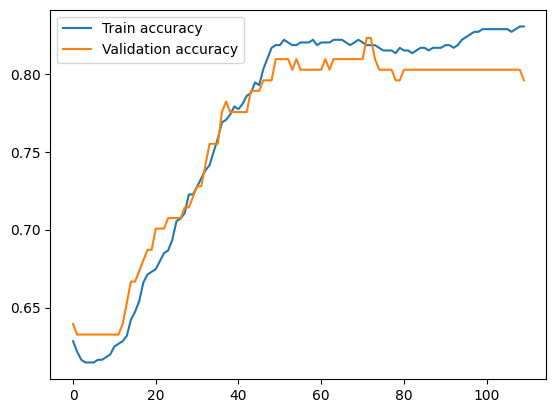

In [ ]:
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend()

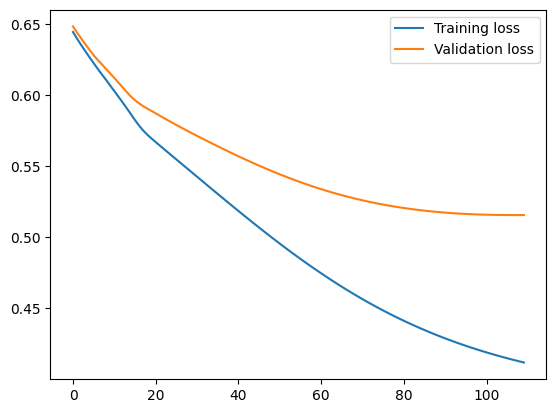

In [ ]:
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.legend()

In [ ]:
model.predict(X_test)
preds = np.round(model.predict(X_test), 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
print(confusion_matrix(y_test, preds))

[[37 17]
 [13 80]]


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        54
           1       0.82      0.86      0.84        93

    accuracy                           0.80       147
   macro avg       0.78      0.77      0.78       147
weighted avg       0.79      0.80      0.79       147



# Cinquième modèle

In [ ]:
model = Sequential()
# 1ere couche cahcée
model.add(Dense(8, input_shape=(X_train.shape[1],), activation="relu"))
# 2eme couche cachée
model.add(Dense(4, activation="relu"))
# couche de sortie
model.add(Dense(1, activation="sigmoid"))
model.summary()

# compile the model
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# now we just update our model fit call
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=100,
    validation_data=(X_test, y_test),
    verbose=2,
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
6/6 - 2s - 264ms/step - accuracy: 0.3853 - loss: 0.6969 - val_accuracy: 0.3673 - val_loss: 0.6960
Epoch 2/200
6/6 - 0s - 16ms/step - accuracy: 0.3801 - loss: 0.6955 - val_accuracy: 0.3061 - val_loss: 0.6946
Epoch 3/200
6/6 - 0s - 15ms/step - accuracy: 0.2877 - loss: 0.6943 - val_accuracy: 0.5646 - val_loss: 0.6933
Epoch 4/200
6/6 - 0s - 24ms/step - accuracy: 0.5873 - loss: 0.6931 - val_accuracy: 0.6327 - val_loss: 0.6921
Epoch 5/200
6/6 - 0s - 16ms/step - accuracy: 0.6130 - loss: 0.6920 - val_accuracy: 0.6327 - val_loss: 0.6909
Epoch 6/200
6/6 - 0s - 16ms/step - accuracy: 0.6130 - loss: 0.6909 - val_accuracy: 0.6327 - val_loss: 0.6898
Epoch 7/200
6/6 - 0s - 17ms/step - accuracy: 0.6130 - loss: 0.6898 - val_accuracy: 0.6327 - val_loss: 0.6887
Epoch 8/200
6/6 - 0s - 17ms/step - accuracy: 0.6130 - loss: 0.6888 - val_accuracy: 0.6327 - val_loss: 0.6877
Epoch 9/200
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6879 - val_accuracy: 0.6327 - val_loss: 0.6867
Epoch 10/200
6/6 -

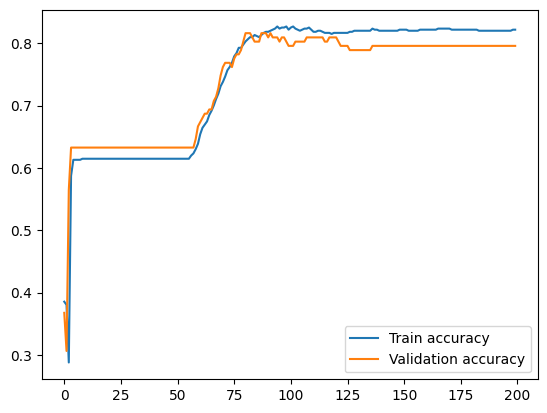

In [ ]:
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend()

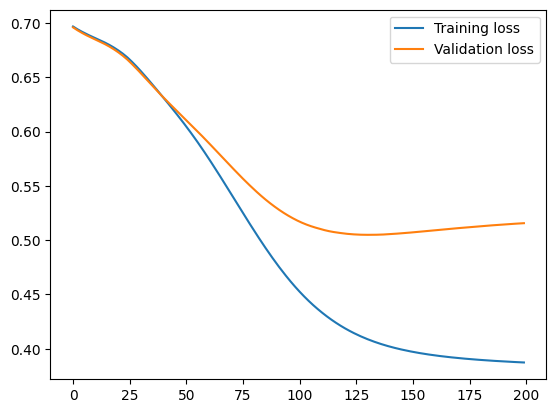

In [ ]:
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.legend()

In [ ]:
model.predict(X_test)
preds = np.round(model.predict(X_test), 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
print(confusion_matrix(y_test, preds))

[[38 16]
 [14 79]]


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72        54
           1       0.83      0.85      0.84        93

    accuracy                           0.80       147
   macro avg       0.78      0.78      0.78       147
weighted avg       0.79      0.80      0.80       147



# Sixième modèle

In [ ]:
model_1 = Sequential()
# 1ere couche cahcée
model_1.add(Dense(8, input_shape=(X_train.shape[1],), activation="relu"))
# 2eme couche cachée
model_1.add(Dense(4, activation="relu"))
# couche de sortie
model_1.add(Dense(1, activation="sigmoid"))
model_1.summary()

# compile the model
model_1.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# now we just update our model fit call
history_1 = model_1.fit(
    X_train,
    y_train,
    epochs=115,
    batch_size=100,
    validation_data=(X_test, y_test),
    verbose=2,
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_131 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/115
6/6 - 2s - 315ms/step - accuracy: 0.6164 - loss: 0.6805 - val_accuracy: 0.6327 - val_loss: 0.6796
Epoch 2/115
6/6 - 0s - 51ms/step - accuracy: 0.6147 - loss: 0.6775 - val_accuracy: 0.6327 - val_loss: 0.6768
Epoch 3/115
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6748 - val_accuracy: 0.6327 - val_loss: 0.6742
Epoch 4/115
6/6 - 0s - 15ms/step - accuracy: 0.6147 - loss: 0.6721 - val_accuracy: 0.6327 - val_loss: 0.6716
Epoch 5/115
6/6 - 0s - 15ms/step - accuracy: 0.6147 - loss: 0.6696 - val_accuracy: 0.6327 - val_loss: 0.6692
Epoch 6/115
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6672 - val_accuracy: 0.6327 - val_loss: 0.6668
Epoch 7/115
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6649 - val_accuracy: 0.6327 - val_loss: 0.6644
Epoch 8/115
6/6 - 0s - 16ms/step - accuracy: 0.6147 - loss: 0.6627 - val_accuracy: 0.6327 - val_loss: 0.6622
Epoch 9/115
6/6 - 0s - 19ms/step - accuracy: 0.6147 - loss: 0.6604 - val_accuracy: 0.6327 - val_loss: 0.6600
Epoch 10/115
6/6 -

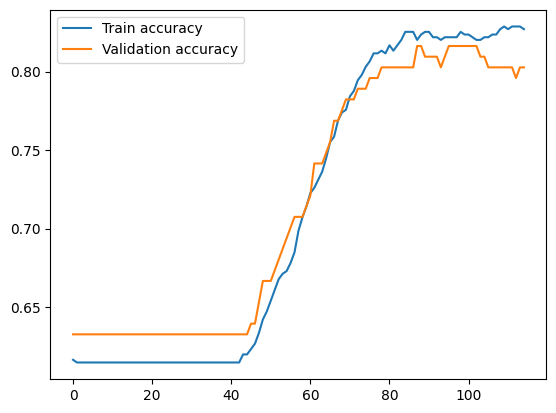

In [ ]:
plt.plot(history_1.history["accuracy"], label = "Train accuracy")
plt.plot(history_1.history["val_accuracy"], label = "Validation accuracy")
plt.legend()

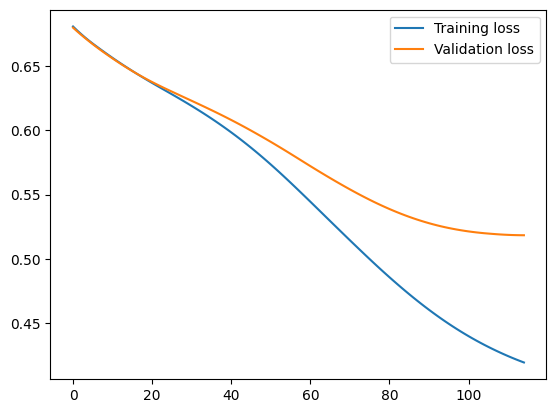

In [ ]:
plt.plot(history_1.history["loss"], label = "Training loss")
plt.plot(history_1.history["val_loss"], label = "Validation loss")
plt.legend()

In [ ]:
model_1.predict(X_test)
preds_1 = np.round(model_1.predict(X_test), 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
print(confusion_matrix(y_test, preds_1))

[[37 17]
 [12 81]]


[[39 15]
 [12 81]]

In [ ]:
print(classification_report(y_test, preds_1))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        54
           1       0.83      0.87      0.85        93

    accuracy                           0.80       147
   macro avg       0.79      0.78      0.78       147
weighted avg       0.80      0.80      0.80       147



  precision    recall  f1-score   support

           0       0.76      0.72      0.74        54
           1       0.84      0.87      0.86        93

    accuracy                           0.82       147
   macro avg       0.80      0.80      0.80       147
weighted avg       0.81      0.82      0.82       147

# Septième modèle

In [ ]:
model = Sequential()
# 1ere couche cahcée
model.add(Dense(16, input_shape=(X_train.shape[1],), activation="relu"))
# 2eme couche cachée
model.add(Dense(8, activation="relu"))
# 3eme couche cachée
model.add(Dense(4, activation="relu"))
# couche de sortie
model.add(Dense(1, activation="sigmoid"))
model.summary()

# compile the model
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# now we just update our model fit call
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=100,
    validation_data=(X_test, y_test),
    verbose=2,
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 - 2s - 373ms/step - accuracy: 0.7106 - loss: 0.6912 - val_accuracy: 0.6395 - val_loss: 0.6912
Epoch 2/50
6/6 - 0s - 28ms/step - accuracy: 0.6986 - loss: 0.6880 - val_accuracy: 0.6190 - val_loss: 0.6895
Epoch 3/50
6/6 - 0s - 52ms/step - accuracy: 0.7517 - loss: 0.6852 - val_accuracy: 0.7279 - val_loss: 0.6867
Epoch 4/50
6/6 - 0s - 30ms/step - accuracy: 0.7979 - loss: 0.6825 - val_accuracy: 0.7687 - val_loss: 0.6838
Epoch 5/50
6/6 - 0s - 28ms/step - accuracy: 0.8151 - loss: 0.6793 - val_accuracy: 0.7687 - val_loss: 0.6810
Epoch 6/50
6/6 - 0s - 23ms/step - accuracy: 0.8116 - loss: 0.6757 - val_accuracy: 0.7483 - val_loss: 0.6786
Epoch 7/50
6/6 - 0s - 16ms/step - accuracy: 0.8065 - loss: 0.6724 - val_accuracy: 0.7483 - val_loss: 0.6760
Epoch 8/50
6/6 - 0s - 17ms/step - accuracy: 0.8082 - loss: 0.6691 - val_accuracy: 0.7551 - val_loss: 0.6731
Epoch 9/50
6/6 - 0s - 17ms/step - accuracy: 0.8134 - loss: 0.6658 - val_accuracy: 0.7619 - val_loss: 0.6702
Epoch 10/50
6/6 - 0s - 19ms

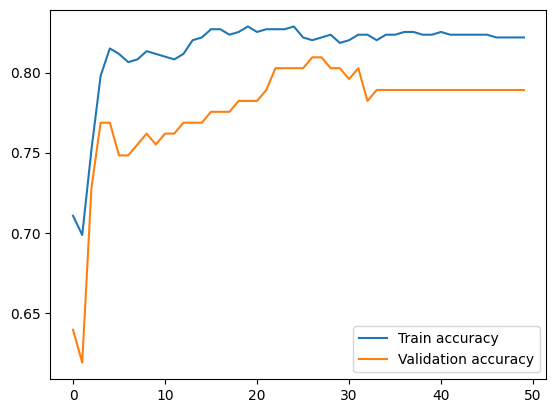

In [ ]:
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend()

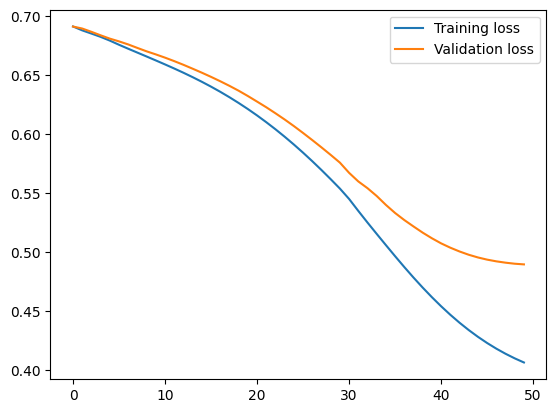

In [ ]:
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.legend()

In [ ]:
model.predict(X_test)
preds = np.round(model.predict(X_test), 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
print(confusion_matrix(y_test, preds))

[[37 17]
 [14 79]]


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      0.69      0.70        54
           1       0.82      0.85      0.84        93

    accuracy                           0.79       147
   macro avg       0.77      0.77      0.77       147
weighted avg       0.79      0.79      0.79       147



# Huitième modèle

In [ ]:
model_2 = Sequential()
# 1ere couche cahcée
model_2.add(Dense(8, input_shape=(X_train.shape[1],), activation="relu"))
# 2eme couche cachée
model_2.add(Dense(4, activation="relu"))
# couche de sortie
model_2.add(Dense(1, activation="sigmoid"))
model_2.summary()

# compile the model
model_2.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# now we just update our model fit call
history_2 = model_2.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=(X_test, y_test),
    verbose=2,
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_157 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 - 3s - 109ms/step - accuracy: 0.3853 - loss: 0.8609 - val_accuracy: 0.3673 - val_loss: 0.8211
Epoch 2/50
30/30 - 0s - 12ms/step - accuracy: 0.3853 - loss: 0.7867 - val_accuracy: 0.3673 - val_loss: 0.7648
Epoch 3/50


KeyboardInterrupt: 

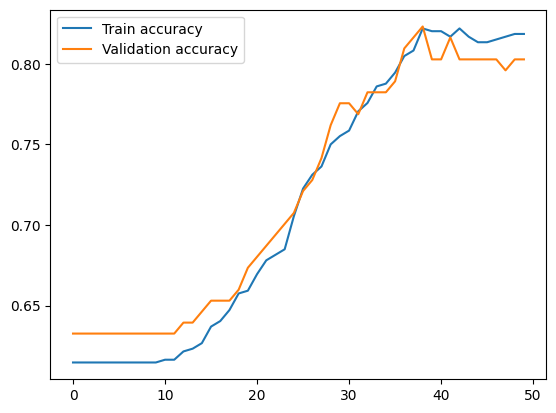

In [ ]:
plt.plot(history_2.history["accuracy"], label = "Train accuracy")
plt.plot(history_2.history["val_accuracy"], label = "Validation accuracy")
plt.legend()

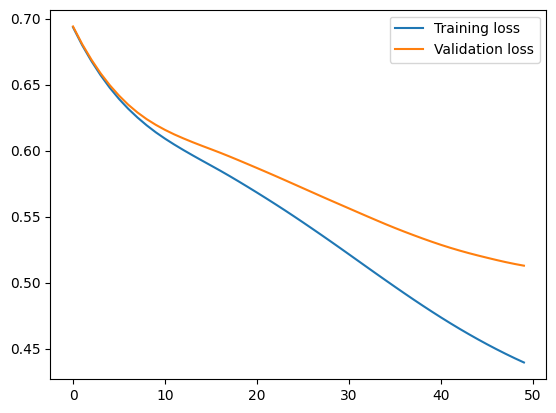

In [ ]:
plt.plot(history_2.history["loss"], label = "Training loss")
plt.plot(history_2.history["val_loss"], label = "Validation loss")
plt.legend()

In [ ]:
model_2.predict(X_test)
preds_2 = np.round(model_2.predict(X_test), 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
print(confusion_matrix(y_test, preds_2))

[[37 17]
 [12 81]]


In [ ]:
print(classification_report(y_test, preds_2))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        54
           1       0.83      0.87      0.85        93

    accuracy                           0.80       147
   macro avg       0.79      0.78      0.78       147
weighted avg       0.80      0.80      0.80       147



Courbe ROC du modèle choisi, le modèle 2 avec une seule couche cachée de 8 neurones, epochs = 115 et batch_size = 100.

In [ ]:
y_pred_proba_nn = model_2.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_nn)
roc_auc = auc(fpr, tpr)
print(f"L'AUC pour le modèle de neurones est : ")
print(roc_auc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
L'AUC pour le modèle de neurones est : 
0.7970927917164476


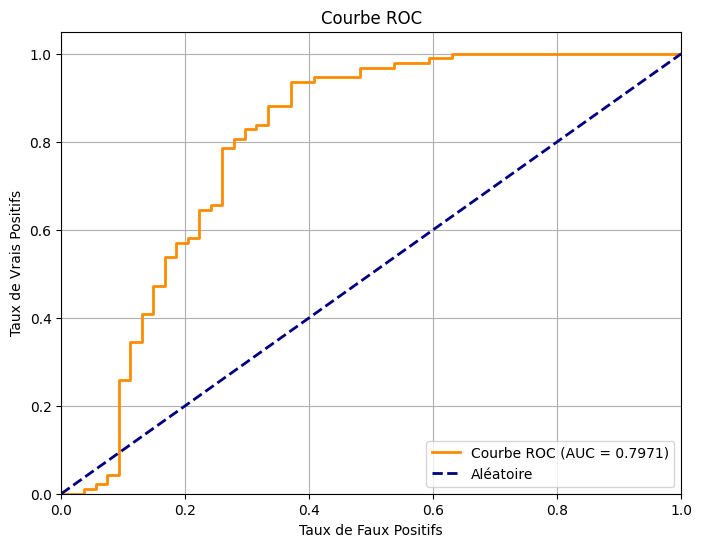

In [ ]:
plt.figure(figsize=(8, 6))

# Tracé de la courbe ROC du modèle
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Courbe ROC (AUC = {roc_auc:.4f})')

# Tracé de la ligne de référence (modèle aléatoire)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# RÉGRESSION LOGISTIQUE

In [ ]:
log_model = LogisticRegression(random_state=42, C=1.0, solver='liblinear')
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        54
           1       0.83      0.87      0.85        93

    accuracy                           0.80       147
   macro avg       0.79      0.78      0.78       147
weighted avg       0.80      0.80      0.80       147



In [ ]:
print(confusion_matrix(y_test, y_pred_log))

[[37 17]
 [12 81]]


In [ ]:
y_pred_proba_nn = log_model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_nn)
roc_auc = auc(fpr, tpr)
print(f"L'AUC pour la régression logistique est : ")
print(roc_auc)

L'AUC pour la régression logistique est : 
0.7780764635603344


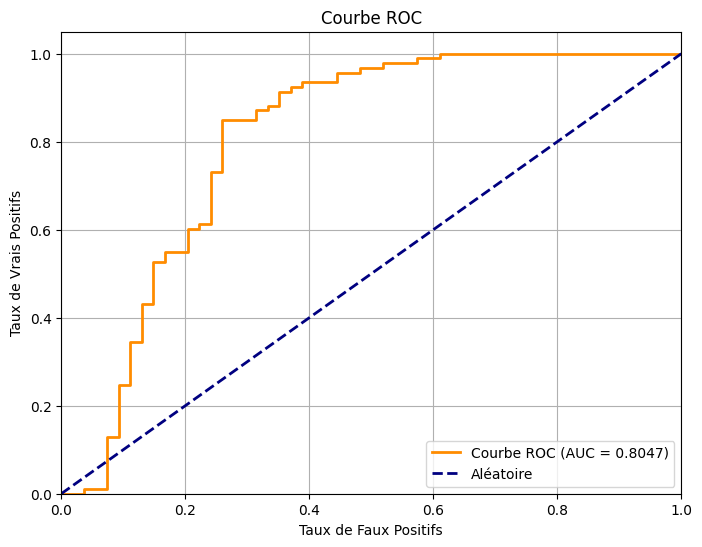

In [ ]:
plt.figure(figsize=(8, 6))

# Tracé de la courbe ROC du modèle
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Courbe ROC (AUC = {roc_auc:.4f})')

# Tracé de la ligne de référence (modèle aléatoire)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()